In [12]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.212 🚀 Python-3.9.9 torch-2.1.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (32 CPUs, 187.0 GB RAM, 13.9/19.5 GB disk)


In [13]:
!nvidia-smi

Sun Nov 19 20:22:38 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           On  | 00000000:18:00.0 Off |                    0 |
| N/A   57C    P0             128W / 300W |   7045MiB / 16384MiB |     55%   E. Process |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import torch

# 检查CUDA是否可用
print(torch.cuda.is_available())

# 查看可用的CUDA设备数量
print(torch.cuda.device_count())

# 获取每个CUDA设备的名称
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))


True
1
Tesla V100-SXM2-16GB


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # 使用第一个GPU


In [14]:
from ultralytics import YOLO

from IPython.display import display, Image

In [17]:
model = YOLO(f'/project/ece601/ec601_lifeguard/yolov8n.pt')
results = model.predict(source='/project/ece601/ec601_lifeguard/dog.jpeg', conf=0.25)


image 1/1 /project/ece601/ec601_lifeguard/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


In [18]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4716,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0539,  786.0336]], device='cuda:0')

In [19]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [20]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [26]:
import zipfile
import os

# 设置您的zip文件路径
zip_path = '/project/ece601/ec601_lifeguard/Drowning Detection 3 Classes.v1i.yolov8.zip'
# 设置解压后文件存放的路径
extract_path = '/project/ece601/ec601_lifeguard/Yolo8/data_3class'

# 使用'with'语句确保文件被正确关闭
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # 解压文件
    zip_ref.extractall(extract_path)

print(f'Files extracted to: {extract_path}')


Files extracted to: /project/ece601/ec601_lifeguard/Yolo8/data_3class


In [23]:
!yolo task=detect mode=train model=yolov8s.pt data=yolo8_dataset/data.yaml epochs=25 imgsz=500 plots=True

/bin/bash: yolo: command not found


In [32]:
from ultralytics import YOLO

# Initialize model for training
model = YOLO('yolov8s.pt')  # Ensure 'yolov8s.pt' is the correct path to your model

# Start training
model.train(
    data='Yolo8/data_3class/data.yaml', 
    epochs=25,
    imgsz=640,
    batch=16,  # You might need to adjust this depending on your GPU
    device='cuda:0' 
)


Ultralytics YOLOv8.0.20 🚀 Python-3.9.9 torch-2.1.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=Yolo8/data_3class/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=cuda:0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

Exception in thread Thread-1451:
Traceback (most recent call last):
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    reraise(*_capture_exception())    
self.run()
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/_compat.py", line 54, in reraise
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/integrations/threading.py", line 69, in run
        raise valuereraise(*_capture_exception())
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/integrations/threading.py", line 67, in run

  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/_compat.py", line 54, in reraise
        return old_run_func(self, *a, **kw)raise value

  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/integrations/threading.py", line 67, in run
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/threadin

:
Traceback (most recent call last):
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/threading.py", line 973, in _bootstrap_inner
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()    self.run()
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/integrations/threading.py", line 69, in run

  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/integrations/threading.py", line 69, in run
    reraise(*_capture_exception())
      File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/_compat.py", line 54, in reraise
reraise(*_capture_exception())
  File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/_compat.py", line 54, in reraise
    raise value
      File "/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sentry_sdk/integrations/threading.py", line 67, in run
raise value
  File "/share/pkg.

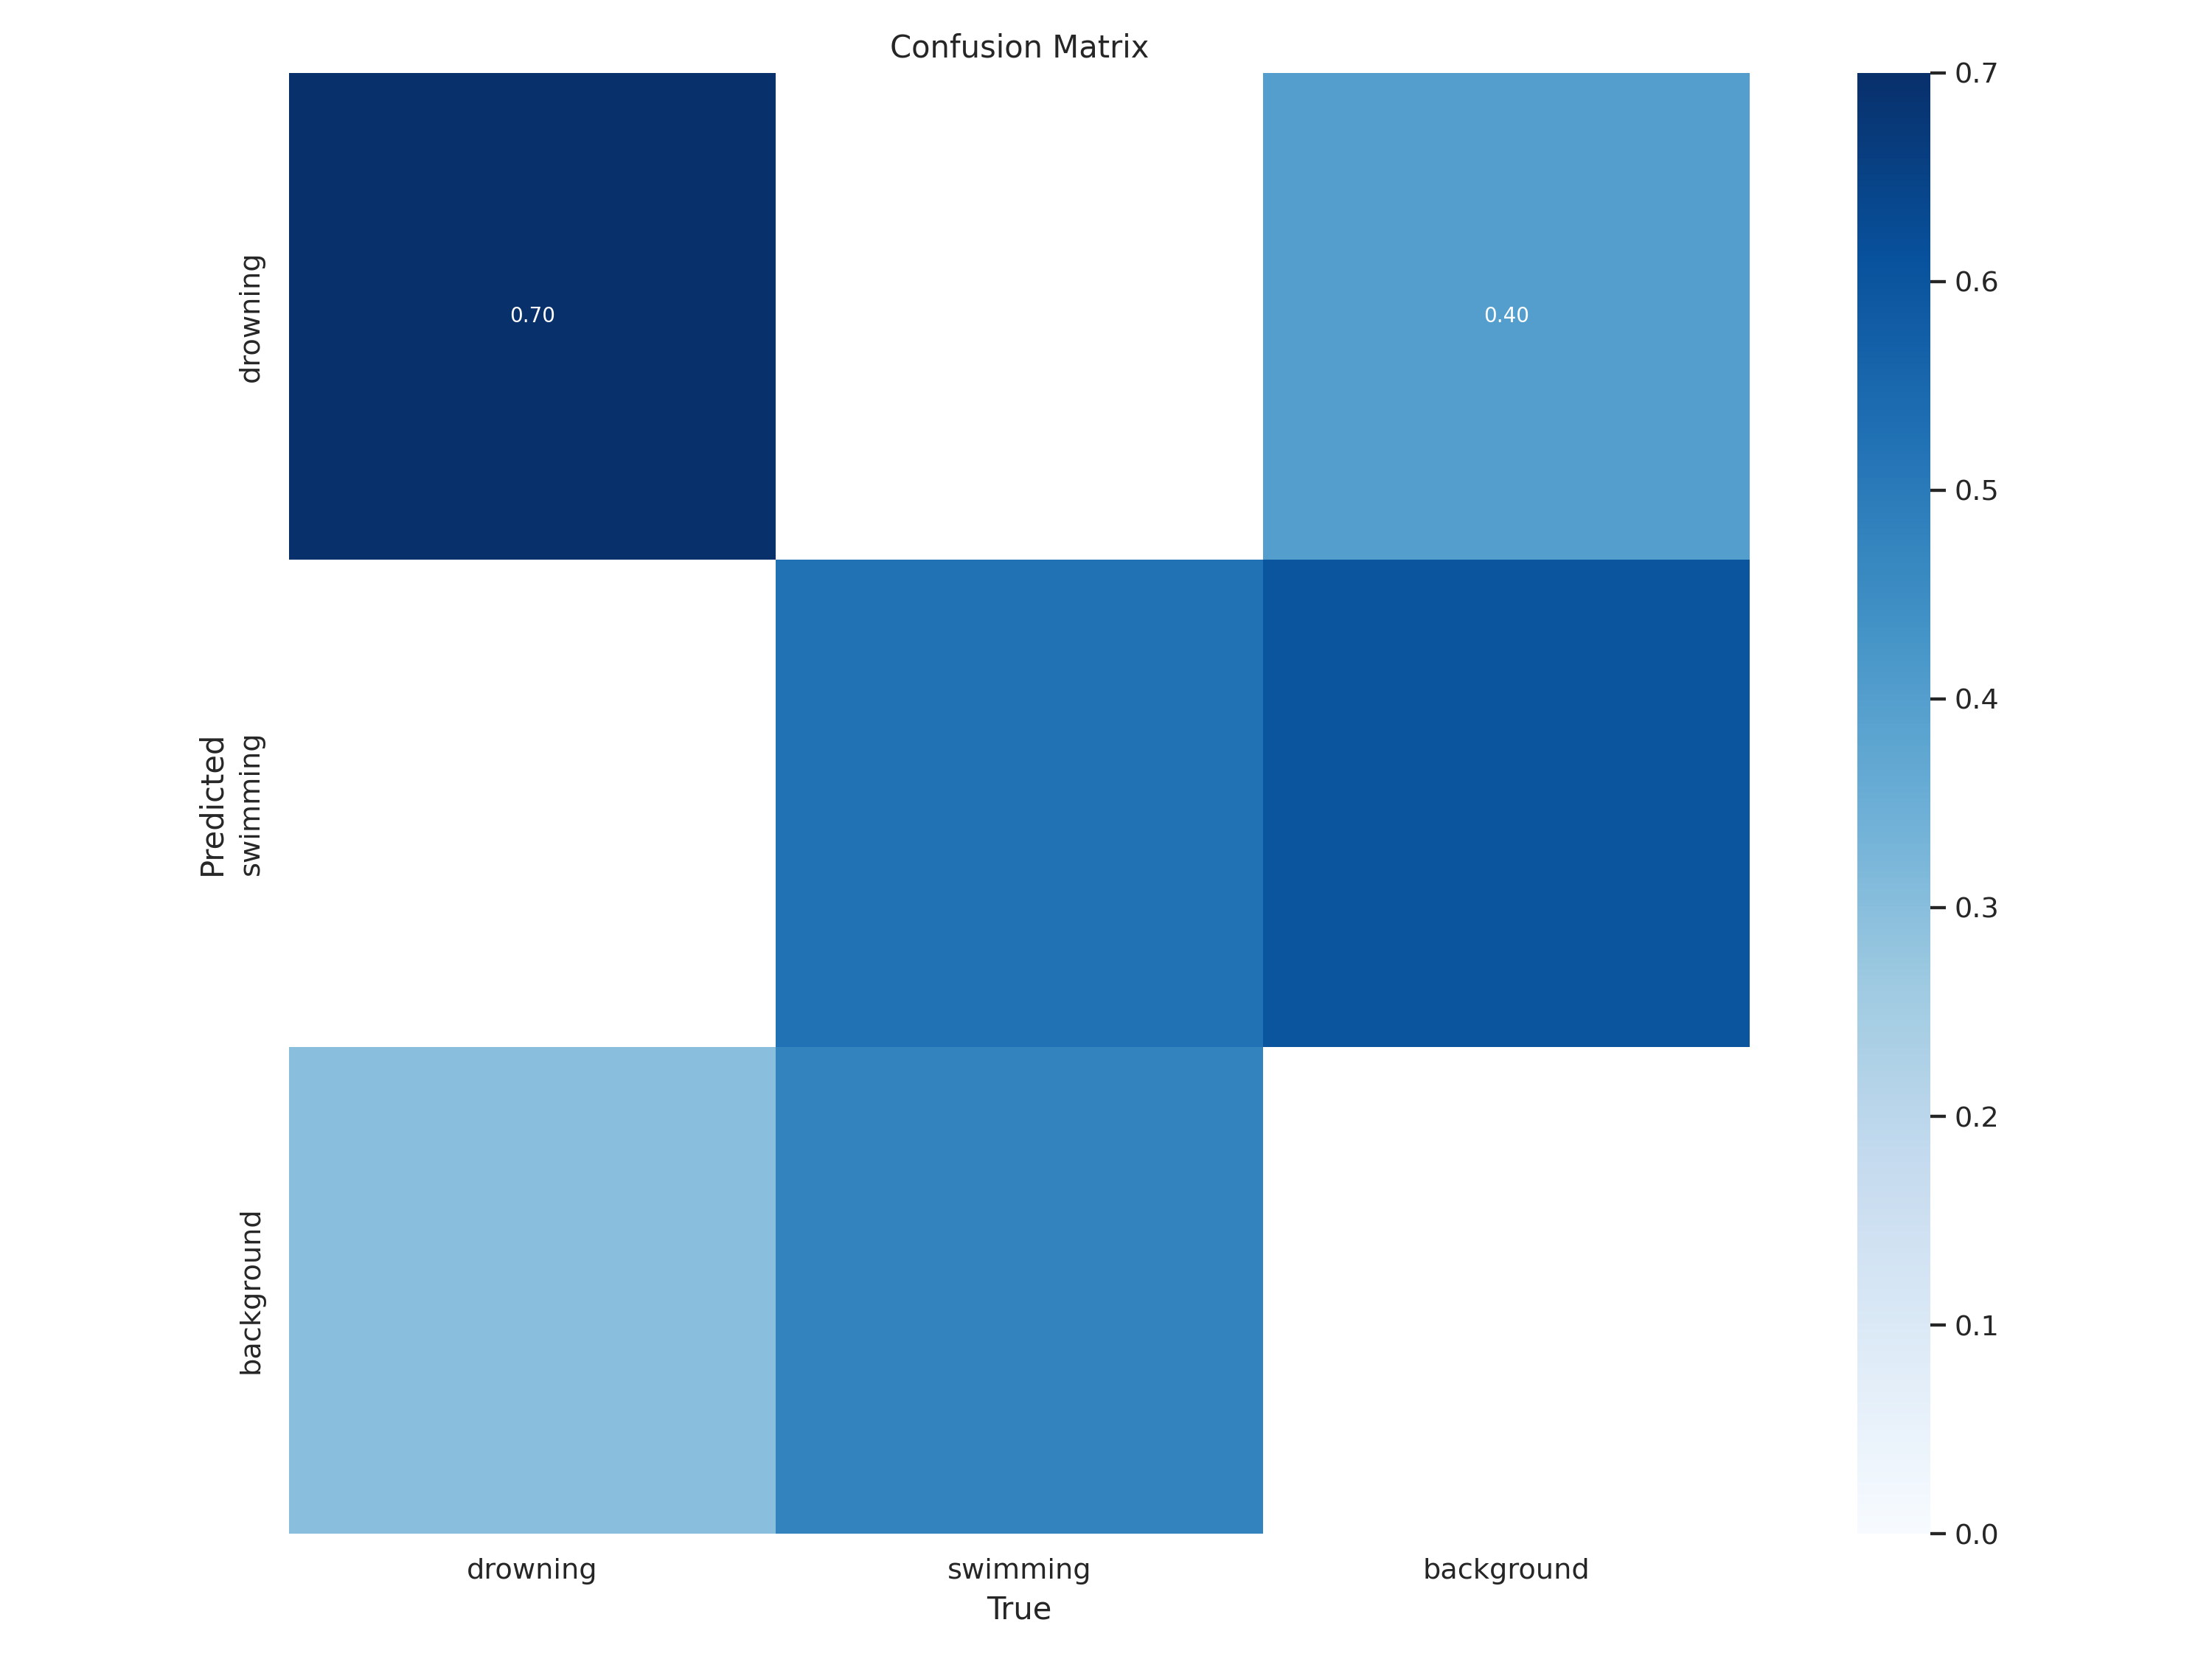

In [25]:
from IPython.display import Image  #epoch 100

Image(filename=f'/project/ece601/ec601_lifeguard/runs/detect/train11/confusion_matrix.png', width=600)

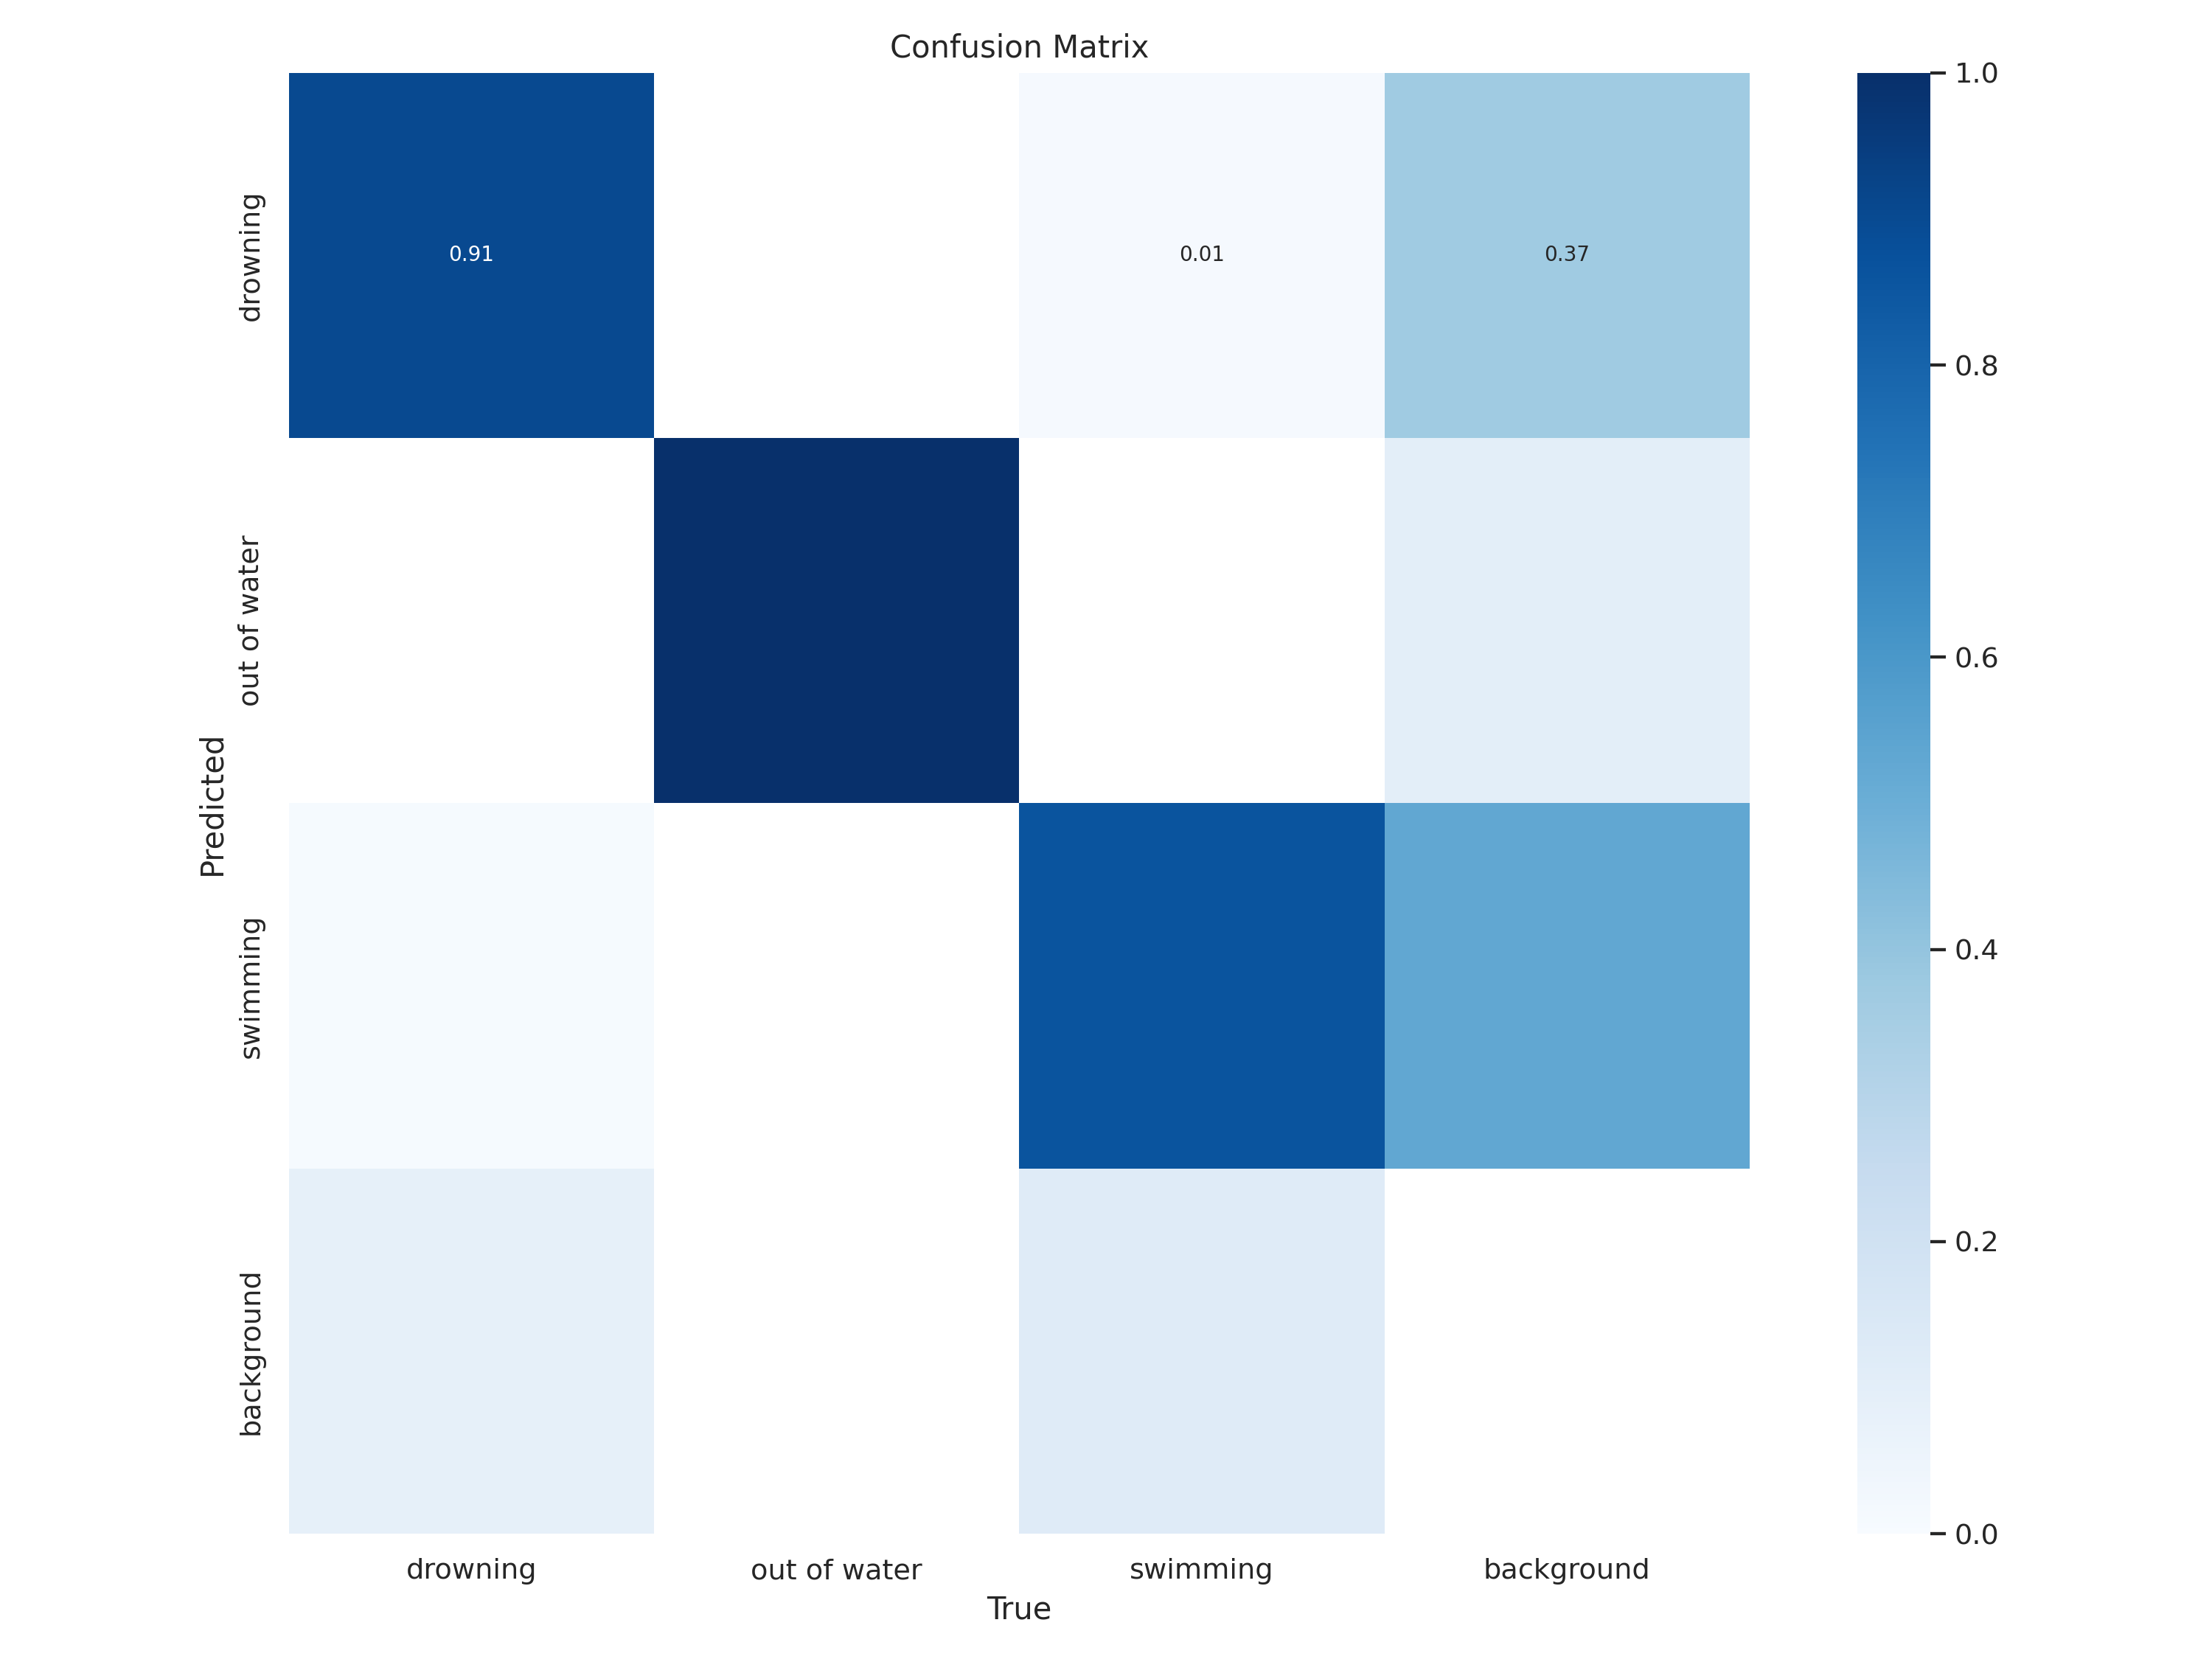

In [33]:
from IPython.display import Image  #epoch 25

Image(filename=f'/project/ece601/ec601_lifeguard/runs/detect/train14/confusion_matrix.png', width=600)

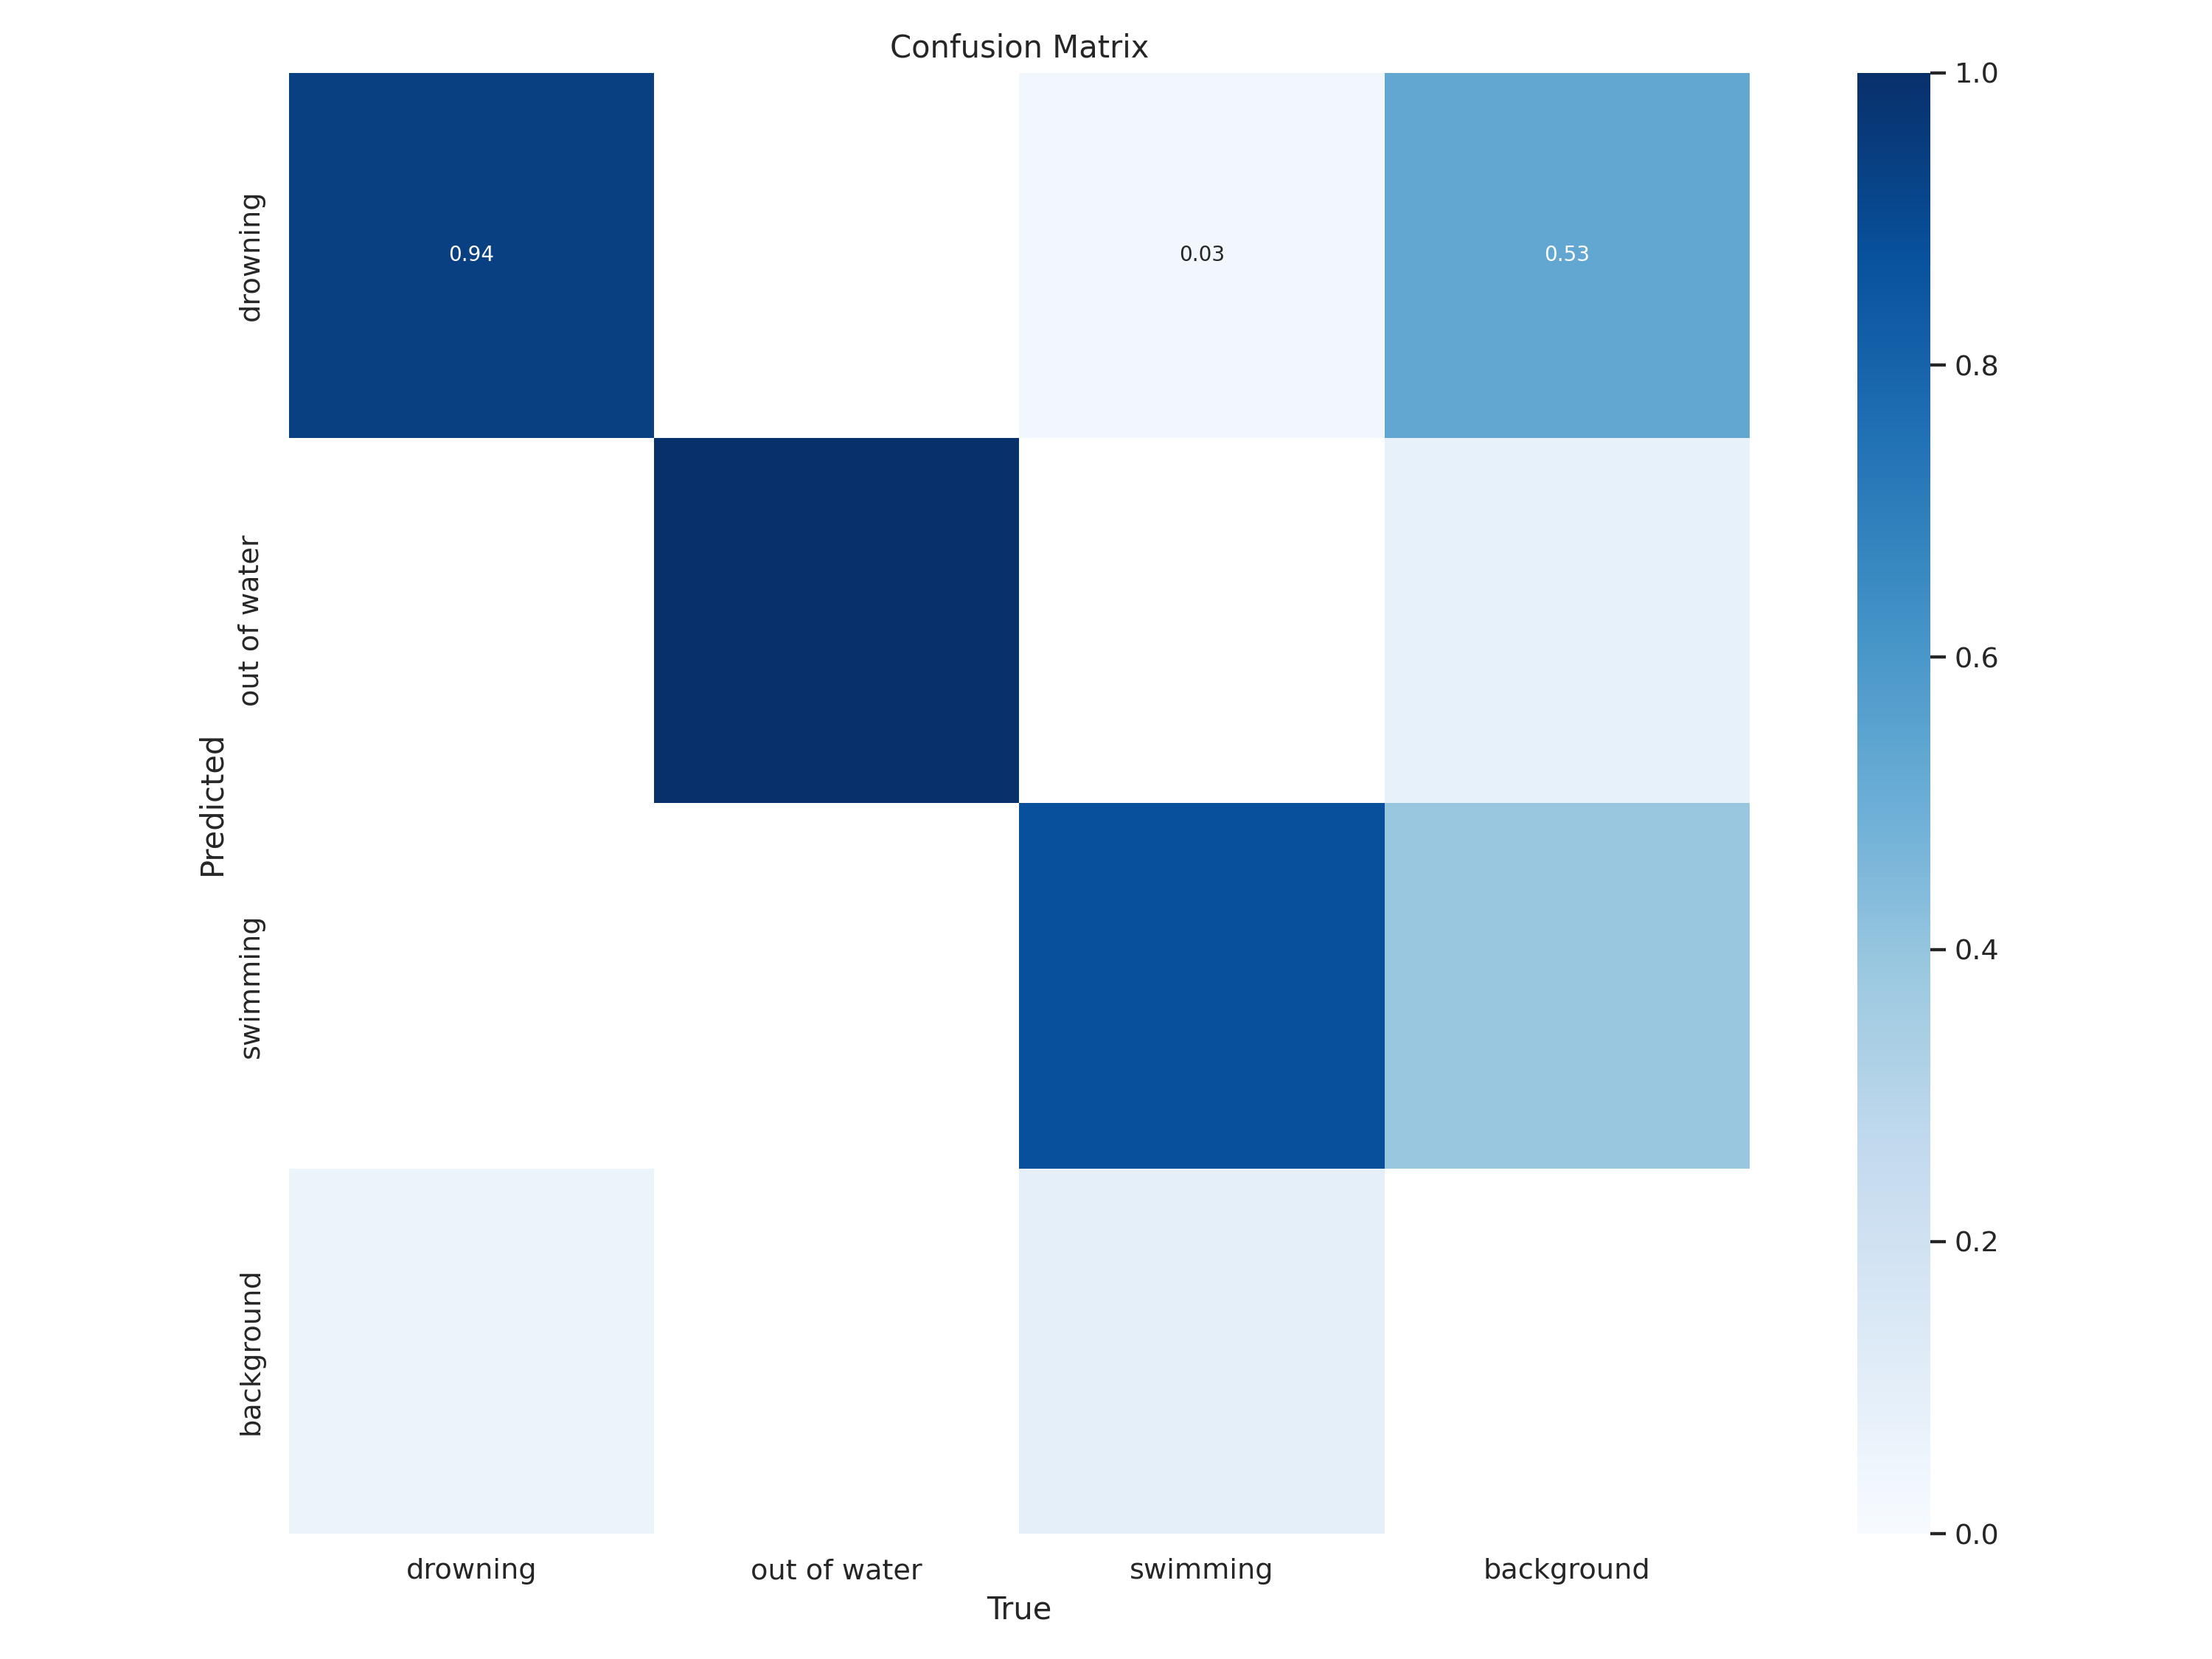

In [31]:
from IPython.display import Image  #epoch 100

Image(filename=f'/project/ece601/ec601_lifeguard/runs/detect/train13/confusion_matrix.png', width=600)

In [3]:
pip install roboflow

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: nb-black 1.0.7 has a non-standard dependency specifier black>='19.3'; python_version >= "3.6". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of nb-black or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [2]:
yolo task=detect \
mode=predict \
model=/project/ece601/ec601_lifeguard/runs/detect/train14/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

NameError: name 'project' is not defined